In [1]:
!pwd

/content


In [2]:
!ls

azdias2.tar.gz	customers2.tar.gz  sample_data


In [3]:
#unzip the files
!tar -xvf azdias2.tar.gz

azdias_scaled.csv


In [4]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#load the azdias data
azdias = pd.read_csv("azdias_scaled.csv")
azdias.head(5)

,AKT_DAT_KL,ANZ_KINDER,ANZ_TITEL,ARBEIT,BALLRAUM,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,...,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,SOHO_KZ,STRUKTURTYP,UMFELD_ALT,UMFELD_JUNG,UNGLEICHENN_FLAG,VERS_TYP,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,CAMEO_DEU_2015_2,CAMEO_DEUG_2015_2,CAMEO_INTL_2015_2,ALTER_HH_2,ALTERSKATEGORIE_FEIN_2,EINGEZOGENAM_HH_JAHR_2,KBA13_ANZAHL_PKW_2,GEBURTSJAHR_2,ANZ_HAUSHALTE_AKTIV_2,ANZ_HH_TITEL_2,ANZ_PERSONEN_2
0,0.0,0.0,0.0,0.375,0.833333,0.2,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,...,0.833333,1.000000,0.333333,0.666667,0.666667,0.666667,0.500000,1.000000,0.166667,0.333333,0.0,0.333333,0.0,1.0,0.75,1.0,0.0,1.0,0.0,0.5,0.9,0.750000,0.9,1.0,1.0,0.375,0.4,0.0,0.125,0.875,0.875,1.00,0.333333,0.666667,0.000000,0.222222,0.444444,0.000000,0.0,0.1
1,1.0,0.0,0.0,0.250,0.833333,0.8,0.00,1.00,1.00,0.25,0.50,0.00,0.00,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,...,0.500000,0.500000,0.333333,0.166667,0.333333,1.000000,0.833333,0.500000,0.666667,0.833333,0.0,1.000000,1.0,0.5,0.50,0.5,1.0,1.0,0.0,1.0,0.7,0.833333,0.9,0.4,1.0,0.500,0.8,1.0,0.000,0.875,0.875,1.00,0.333333,1.000000,0.555556,0.888889,1.000000,0.833333,0.0,0.2
2,1.0,0.0,0.0,0.250,0.166667,0.4,0.25,0.75,0.75,0.00,0.50,0.25,0.25,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.0,1.000000,0.0,0.000000,0.000000,0.000000,0.857143,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,...,1.000000,1.000000,0.333333,0.500000,0.333333,0.333333,0.500000,0.333333,0.500000,0.333333,0.5,0.666667,0.0,1.0,0.25,1.0,0.0,0.0,0.0,0.5,0.8,0.666667,0.5,0.4,1.0,0.250,0.8,1.0,0.250,0.375,0.375,0.25,0.555556,0.666667,0.333333,0.666667,0.777778,0.833333,0.0,0.1
3,0.0,0.0,0.0,0.125,0.500000,0.2,0.50,0.25,0.25,0.75,0.75,1.00,0.50,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.857143,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,...,0.666667,0.500000,0.500000,0.500000,0.000000,0.500000,0.333333,0.166667,0.666667,0.500000,0.5,0.333333,0.0,0.0,0.75,1.0,0.0,0.0,0.2,0.0,0.6,0.750000,1.0,1.0,1.0,0.875,0.4,1.0,0.375,0.125,0.125,0.00,0.222222,0.333333,0.222222,0.555556,0.222222,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.375,0.166667,0.8,0.50,0.50,0.50,0.50,0.75,0.50,0.50,0.5,0.833333,0.444444,0.142857,0.333333,0.0,1.0,0.444444,1.0,0.857143,0.857143,0.142857,0.857143,0.0,0.857143,0.0,0.142857,0.714286,0.0,0.0,1.0,1.0,0.0,0.555556,0.0,1.0,0.0,...,0.166667,0.333333,0.833333,0.500000,0.166667,0.500000,0.166667,0.500000,0.833333,0.166667,1.0,0.666667,0.0,1.0,0.75,0.5,0.0,1.0,0.0,0.5,0.2,0.333333,0.3,0.2,1.0,0.375,0.6,0.0,0.250,0.625,0.625,0.75,0.888889,0.444444,0.555556,0.333333,0.333333,0.333333,0.0,0.4


In [7]:
azdias.shape

(891221, 350)

In [8]:
#function to model pca and calculate the variance
from sklearn.decomposition import PCA
from scipy.interpolate import make_interp_spline, BSpline

def pca_variance(dataframe, components):  #function to model pca and plot the variance graph
    variance = []
    for value in components:
        pca_model = PCA(n_components=value)  #model the pca
        pca_model.fit_transform(dataframe)   
        variance.append(pca_model.explained_variance_ratio_.cumsum()[value-1])  #get the variace value
    print(variance)
    print(components)    

In [9]:
pca_components = [110,120]
pca_variance(azdias,pca_components)

[0.8218630006090925, 0.8412655807822145]
[110, 120]


In [10]:
pca_components = [130,140]
pca_variance(azdias,pca_components)

[0.859175979216605, 0.8756760189295024]
[130, 140]


In [11]:
pca_components = [150,160]
pca_variance(azdias,pca_components)

[0.8909399374647844, 0.9047352506022815]
[150, 160]


In [12]:
pca_components = [170,180]
pca_variance(azdias,pca_components)

[0.9171057845275419, 0.9280132999633186]
[170, 180]


In [ ]:
# variance = [0.8924913274292778, 0.905900041582257, 0.9178432123117752, 0.9286006632350323, 0.9381830509339177, 0.946636170547178]
# components = [110, 120, 130, 140, 150, 160]

In [13]:
variance = [0.8218630006090925, 0.8412655807822145, 0.859175979216605, 0.8756760189295024, 0.8909399374647844, 0.9047352506022815,0.9171057845275419, 0.9280132999633186]
components = [110, 120, 130, 140, 150, 160, 170,180]

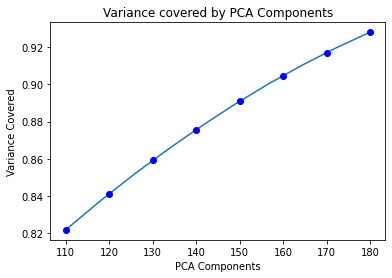

In [14]:
#plot the variance
components_smooth = np.linspace(components[0], components[-1], 10)  #10 points are selected to get a smooth line
spl = make_interp_spline(components, variance, k=3)  # type: BSpline
varaince_smooth = spl(components_smooth)

# plt.scatter(components, variance)   #plot the variance as a scatter graph
plt.plot(components_smooth, varaince_smooth)  #plot the smooth line

plt.plot(components, variance, 'bo')   #plot the variance as a scatter graph
plt.ylabel("Variance Covered")
plt.xlabel("PCA Components")
plt.title("Variance covered by PCA Components")
plt.show()   

In [15]:
#select a good pca_component and transofrm the dataset. 

pca_model = PCA(n_components=170)  #selected value is 170
azdias_transformed = pca_model.fit_transform(azdias)

---------------------------------

converting the customers df

In [5]:
!tar -xvf customers2.tar.gz

customers_scaled.csv


In [16]:
#load the customers data
customers = pd.read_csv("customers_scaled.csv")
customers.head(5)

,AKT_DAT_KL,ANZ_KINDER,ANZ_TITEL,ARBEIT,BALLRAUM,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,...,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,SOHO_KZ,STRUKTURTYP,UMFELD_ALT,UMFELD_JUNG,UNGLEICHENN_FLAG,VERS_TYP,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,CAMEO_DEU_2015_2,CAMEO_DEUG_2015_2,CAMEO_INTL_2015_2,ALTER_HH_2,ALTERSKATEGORIE_FEIN_2,EINGEZOGENAM_HH_JAHR_2,KBA13_ANZAHL_PKW_2,GEBURTSJAHR_2,ANZ_HAUSHALTE_AKTIV_2,ANZ_HH_TITEL_2,ANZ_PERSONEN_2
0,0.0,0.0,0.0,0.00,0.333333,0.8,0.75,0.00,0.00,1.0,1.00,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.857143,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.888889,0.888889,1.000000,0.0,0.0,...,0.000000,0.333333,0.500000,1.000000,0.833333,0.166667,0.000000,0.166667,0.833333,0.0,0.833333,1.000000,0.0,1.0,0.75,0.75,0.0,0.0,0.0,0.75,0.4,0.166667,0.1,1.0,1.0,0.875,0.4,0.0,0.375,0.000,0.000,0.00,0.000000,0.111111,0.000000,1.000000,0.000000,0.000000,0.0,0.2
1,1.0,0.0,0.0,0.25,0.833333,1.0,1.00,0.00,0.00,1.0,1.00,1.0,1.0,0.000000,0.166667,0.555556,0.000000,0.833333,0.000000,1.0,1.000000,0.0,0.857143,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.857143,0.0,0.000000,0.0,0.0,0.166667,0.555556,1.000000,0.888889,0.0,0.0,...,0.166667,0.333333,0.500000,0.666667,0.833333,0.500000,0.000000,0.166667,0.333333,0.0,1.000000,1.000000,0.0,1.0,0.50,1.00,0.0,0.0,0.0,0.50,0.5,0.416667,0.2,1.0,1.0,0.375,0.4,0.0,0.375,0.125,0.125,0.25,0.111111,0.111111,0.666667,1.000000,0.000000,0.000000,0.0,0.3
2,0.0,0.0,0.0,0.25,1.000000,0.2,1.00,0.25,0.25,1.0,1.00,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.000000,0.857143,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.0,...,0.833333,1.000000,0.000000,1.000000,0.333333,0.500000,0.166667,0.000000,0.166667,0.0,0.333333,0.333333,0.0,1.0,0.00,1.00,0.0,1.0,0.0,1.00,0.9,1.000000,1.0,1.0,1.0,0.250,0.4,1.0,0.375,0.500,0.500,0.50,0.000000,0.000000,0.111111,0.333333,0.000000,0.000000,0.0,0.1
3,0.0,0.0,0.0,0.00,1.000000,0.2,1.00,0.00,0.00,1.0,1.00,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.857143,0.0,0.000000,0.0,0.000000,0.0,0.0,0.166667,0.555556,0.555556,1.000000,0.0,0.0,...,0.333333,0.333333,0.500000,0.666667,0.500000,0.333333,0.333333,0.333333,0.833333,0.5,1.000000,0.000000,0.0,0.0,0.50,0.75,0.0,0.0,0.0,0.50,0.5,0.250000,0.1,1.0,1.0,0.875,0.0,0.0,0.375,0.375,0.375,0.25,0.000000,0.000000,0.111111,0.777778,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.25,0.333333,1.0,0.75,0.50,0.50,0.5,0.75,0.5,0.5,0.166667,0.333333,0.222222,0.714286,0.000000,0.428571,1.0,0.666667,0.0,0.000000,0.0,0.857143,0.000000,0.0,0.285714,0.0,0.571429,0.0,0.857143,0.0,0.5,0.833333,0.000000,0.777778,0.000000,1.0,0.0,...,0.166667,0.333333,0.666667,0.833333,0.833333,0.666667,0.666667,0.500000,0.500000,0.5,0.666667,0.333333,0.0,1.0,0.25,0.75,0.0,1.0,0.0,1.00,0.2,0.333333,0.3,0.2,1.0,0.375,0.0,0.0,0.250,0.750,0.750,0.75,0.888889,0.444444,0.111111,0.444444,0.333333,0.666667,0.0,0.4


In [17]:
customers.shape

(191652, 350)

In [18]:
customers_transformed = pca_model.transform(customers)

--------------------

Saving the transformd np arrays to df and then to gzip

In [19]:
azdias_transformed_df = pd.DataFrame(azdias_transformed)
customers_transformed_df = pd.DataFrame(customers_transformed)

In [20]:
azdias_transformed_df.to_csv("azdias_transformed.gzip",index = False, compression="gzip")

In [21]:
customers_transformed_df.to_csv("customers_transformed.gzip",index = False, compression="gzip")

Elbow Plot


In [22]:
#plot the elbow graph to find the optimum k for k-means
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(3,18)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(azdias_transformed)
    value = km.inertia_
    Sum_of_squared_distances.append(km.inertia_)
    print('{} and {} is done!'.format(k,value))

3 and 19101670.897752788 is done!
4 and 18473412.900836088 is done!
5 and 17998313.638482377 is done!
6 and 17625599.474804416 is done!
7 and 17364182.332419813 is done!
8 and 17133268.665771253 is done!
9 and 16958477.17330367 is done!
10 and 16801939.93121694 is done!
11 and 16666725.068677064 is done!
12 and 16552372.559374245 is done!
13 and 16432142.602628695 is done!
14 and 16344327.71689674 is done!
15 and 16260535.705382742 is done!
16 and 16189203.441679705 is done!
17 and 16106114.367119506 is done!


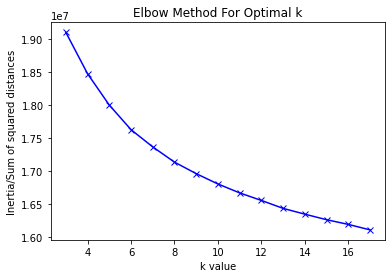

In [23]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k value')
plt.ylabel('Inertia/Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

analyse the pca

In [24]:
#variance covered by each PC
variance_ratio = pca_model.explained_variance_ratio_

In [25]:
#df column contribution to PC components 
PC_arr = pca_model.components_

In [26]:
#get the top1
variance_ratio

array([0.10256101, 0.0639345 , 0.05218117, 0.04563477, 0.03073576,
       0.02628181, 0.02156157, 0.01768516, 0.01760421, 0.01444148,
       0.01437168, 0.01297651, 0.01149083, 0.01105684, 0.01059265,
       0.00955002, 0.00926566, 0.00902108, 0.00815573, 0.00794199,
       0.007643  , 0.00732818, 0.00715608, 0.00692198, 0.00652831,
       0.00632444, 0.00612549, 0.00598741, 0.00582973, 0.00577049,
       0.0055401 , 0.00538552, 0.00531267, 0.00526519, 0.0050836 ,
       0.00493436, 0.00490131, 0.00475126, 0.00465497, 0.00459044,
       0.00457076, 0.00449411, 0.00442233, 0.00433308, 0.00421775,
       0.00413956, 0.00406477, 0.00403641, 0.00397129, 0.00390756,
       0.00387273, 0.00378797, 0.00376838, 0.00372317, 0.0036846 ,
       0.00362347, 0.00355343, 0.00353347, 0.00347437, 0.0034465 ,
       0.00340252, 0.00335926, 0.00330677, 0.00326667, 0.00321636,
       0.00318492, 0.00315459, 0.00312434, 0.00306372, 0.00305425,
       0.003025  , 0.00297186, 0.00294434, 0.00291724, 0.00289

In [34]:
pc1 = list(np.around(np.array(PC_arr[0]),4))
pc1_cp = list(np.around(np.array(PC_arr[0]),4))

In [35]:
def find_index(features, original):
    maximum_index = []
    minimum_index = []
    print(original)
    while len(maximum_index)<3:
        maxi = max(features)
        maximum_index.append(original.index(maxi))
        features.remove(maxi)
    print(maximum_index)
    
    while len(minimum_index)<3:
        mini = min(features)
        minimum_index.append(original.index(mini))
        features.remove(mini)
    print(minimum_index)

In [36]:
find_index(pc1,pc1_cp)

[-0.0942, 0.0054, 0.0001, -0.0328, 0.0495, -0.0164, -0.055, -0.0538, -0.0757, 0.0444, 0.0066, 0.0451, 0.0242, 0.0109, 0.0182, -0.0362, 0.0463, 0.032, 0.0096, -0.0052, -0.0281, 0.026, 0.0301, 0.0393, 0.0738, 0.0413, 0.0249, 0.0922, 0.0129, 0.0491, 0.0205, 0.0462, 0.0239, 0.074, 0.1044, -0.1348, -0.0521, -0.1194, 0.1311, 0.0634, 0.0783, 0.064, -0.151, -0.1507, 0.0695, 0.0267, 0.071, 0.0216, 0.0425, 0.0735, 0.0461, 0.0367, 0.1032, 0.0478, 0.0982, 0.0036, 0.0067, -0.0238, 0.0512, -0.0099, -0.0009, 0.0005, 0.0408, 0.0196, 0.0598, 0.087, -0.1212, -0.0419, -0.1121, 0.1237, 0.0511, 0.0105, 0.0183, -0.0459, -0.0042, -0.0011, 0.0008, 0.0693, 0.0961, 0.0314, -0.0071, -0.1192, -0.0435, -0.1064, 0.1178, -0.0749, -0.042, 0.0437, 0.0303, 0.0594, -0.0339, 0.0392, 0.0889, -0.0255, 0.1002, -0.0362, 0.0192, -0.0987, 0.0672, -0.0319, -0.0117, 0.0272, 0.0198, 0.0819, 0.1393, 0.0002, -0.069, -0.0719, 0.0984, -0.016, -0.0094, 0.0239, 0.0325, 0.0349, 0.0018, 0.1159, 0.0208, 0.0203, -0.0025, -0.0079, -0.0128, 

In [31]:
column_names = azdias.columns

In [37]:
print("The 3 most positive variables for the PC1 are {}, {}, {}".format(column_names[285],column_names[286],column_names[104]))
print("The 3 most negative variables for the PC1 are {}, {}, {}".format(column_names[341],column_names[42],column_names[43]))

The 3 most positive variables for the PC1 are LP_STATUS_FEIN, LP_STATUS_GROB, KBA05_ANTG1
The 3 most negative variables for the PC1 are CAMEO_INTL_2015_2, D19_KONSUMTYP, D19_KONSUMTYP_MAX
